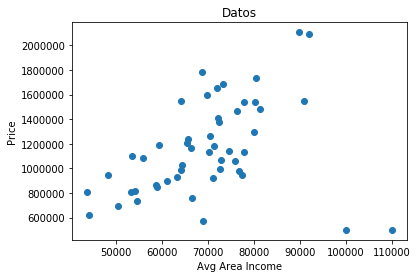

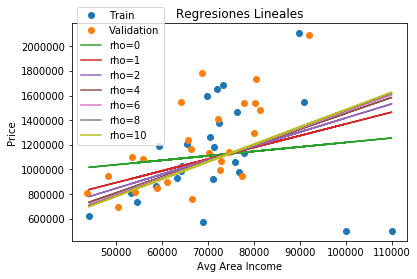

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


file="T1_Housing" 
datos=pd.read_csv(file+".csv",header=0)
df = pd.DataFrame(datos, columns= ["Avg Area Income","Price","In Sample"])
x=[x for x in df["Avg Area Income"]]
y=[y for y in df["Price"]]
Sample=[z for z in df["In Sample"]]

X=[]
Y=[]
Xout=[]
Yout=[]

for i in range(len(x)):
    if Sample[i]==1:
        X+=[x[i]]
        Y+=[y[i]]
    else:
        Xout+=[x[i]]
        Yout+=[y[i]]

#grafico para los datos en general
plt.plot(x,y,"o")
plt.xlabel("Avg Area Income")
plt.ylabel("Price")
plt.title("Datos")
plt.show()

#grafico para las regresiones lineales
plt.plot(X,Y,"o",label="Train")
plt.plot(Xout,Yout,"o",label="Validation")
plt.xlabel("Avg Area Income")
plt.ylabel("Price")
plt.title("Regresiones Lineales")

Xcv=[]
Xoutcv=[]
for i in range(len(X)):
    Xcv+=[[X[i],1]]
    Xoutcv+=[[Xout[i],1]]


X=np.array(X)           #X in sample
Xcv=np.array(Xcv)       #X in sample con los 1
Y=np.array(Y)           #Y in sample
Xout=np.array(Xout)     #X out sample
Xoutcv=np.array(Xoutcv) #X out sample con los 1
Yout=np.array(Yout)     #Y out sample 
#cv significa cambio de variable xddd    

#reg_lineal: (array25x2,array25x1,float)----> array2x1
#            (   X     ,     Y   , rho )----> theta        )
def reg_lineal(X,Y,rho):
    Xt=X.transpose()
    inversa=np.linalg.inv(np.dot(Xt,X)+rho*np.eye(len(X[0])))
    A=Xt.dot(Y)
    theta=inversa.dot(A)
    return theta
    

plots=[0,1,2,4,6,8,10] #valores de rho que voy a graficar 
for rho in plots:
    plt.plot(X,Xcv.dot(reg_lineal(Xcv,Y,rho)),label="rho="+str(rho))
    plt.legend(loc='upper left', bbox_to_anchor=(0, 0.6, 0.5, 0.5))




Text(0.5, 1.0, 'ECM v/s ρ')

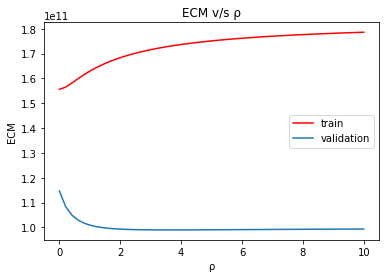

In [22]:
RHO=np.linspace(0,10,50)
P=[]
Pout=[]
#P es una lista donde cada cordenada i representa el vector Y_gorro predicho por reg_lineal con rho=Rho[i] para los puntos insample   
#Pout es una lista donde cada cordenada i representa el vector Y_gorro predicho por reg_lineal con rho=Rho[i] para los puntos outsample  
for i in range(50): 
    theta=(reg_lineal(Xcv,Y,RHO[i]))
    P+=[Xcv.dot(theta)]
    Pout+=[Xoutcv.dot(theta)]
#ECM: (array25x1,array25x1)---> float #Aqui en realidad el P es una lista y el Y es un np.array pero funciona igual mira tu xd
#     (    P    ,   Y     )---> error cuadratico medio  
def ECM(P,Y):
    n=len(Y)
    E=P-Y
    suma=0
    for i in range(n):
        suma+=E[i]**2
    return suma/n

error=[]
errorout=[]
for i in range(50):
    error+=[ECM(P[i],Y)]
    errorout+=[ECM(Pout[i],Yout)]

plt.plot(RHO,error,label="train",color="red")
plt.plot(RHO,errorout,label="validation")
plt.legend()
plt.xlabel("ρ")
plt.ylabel("ECM")
plt.title("ECM v/s ρ")


    
    
    

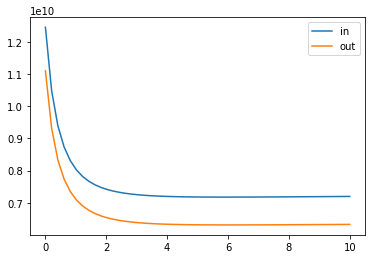

In [19]:
def Var_reg(X,Y,rho,X2,P):
    n=len(X2)
    inv=np.linalg.inv(np.dot(np.transpose(X),X)+rho*np.eye(len(X[0])))
    sigma2=ECM(X.dot(reg_lineal(X,Y,rho)),Y)
    c=np.dot(np.transpose(X),X)
    W=np.dot(inv,np.dot(c,inv))
    result=0
    for i in range(n):
        result+=np.dot(np.transpose(X2[i]),np.dot(W,X2[i]))
    return sigma2*result/n

VAR=[]
VARout=[]
for i in range(50):
    VAR+=[Var_reg(Xcv,Y,RHO[i],Xcv,P[i])]
    VARout+=[Var_reg(Xcv,Y,RHO[i],Xoutcv,Pout[i])]
    
plt.plot(RHO,VAR,label="in")
plt.plot(RHO,VARout,label="out")
plt.legend()    